<a href="https://www.kaggle.com/madanneupane/testing-different-regression-models?scriptVersionId=82663503" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Graduate Admission - Finding the best regression model

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


#### Creating dataframe

In [2]:
df= pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

### Exploring Dataset

In [3]:
#Finding the shape of the dataframe (rows, column)
df.shape

(500, 9)

In [4]:
#Brief info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
#Taking 5 sample rows
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
196,197,306,105,2,3.0,2.5,8.26,0,0.73
94,95,303,99,3,2.0,2.5,7.66,0,0.36
62,63,304,105,2,3.0,3.0,8.20,1,0.54
10,11,325,106,3,3.5,4.0,8.40,1,0.52
96,97,306,100,2,3.0,3.0,8.00,0,0.48


#### Checking for NA values

In [6]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Excluding Serial No. as it is an unnecessary column for us

In [7]:
df = df.iloc[:,1:9]

#### Removing space from  `Chance of Admit `

In [8]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [9]:
df['CGPA'] = df['CGPA']*4/10

I fixed some columns which had some inconsistency in name and values. The dataset had no null values but it had some feature to be altered, for instance, the GPA was in Indian standard (i.e., on a scale of 10.0) which I later converted on a 4.0 scale before training the model as per the supervisor’s permission. Similarly, there were issues with column names.

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,3.860,1,0.92
1,324,107,4,4.0,4.5,3.548,1,0.76
2,316,104,3,3.0,3.5,3.200,1,0.72
3,322,110,3,3.5,2.5,3.468,1,0.80
4,314,103,2,2.0,3.0,3.284,0,0.65


Now the dataset is ready to be processed for making visualization and developing the model.

#### Finding Correlation among the features

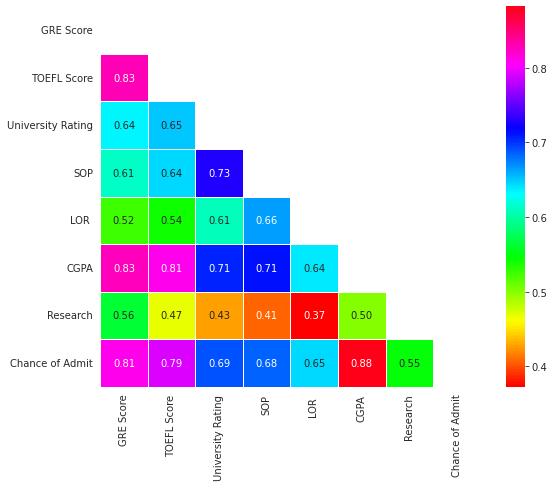

In [11]:
corr = df.corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#### Splitting dataset into testing and training data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

The above dataset is divided into training inputs, testing inputs, test outputs and training outputs by using `train_test_split` methods and we have not specific the size to divide. we can define by `test_size = 0.2` means 20%.

In [14]:
print(X_train.shape, X_test.shape)

(400, 7) (100, 7)


#### Training and evaluating model with different regression algorithms and `root mean squared error` as the accuracy factor:

In [15]:
regressors=[['Linear Regression',LinearRegression()],
       ['Decision Tree Regression',DecisionTreeRegressor()],
       ['Random Forest Regression',RandomForestRegressor()],
       ['Gradient Boosting Regression', GradientBoostingRegressor()],
       ['Ada Boosting Regression',AdaBoostRegressor()],
       ['Extra Tree Regression', ExtraTreesRegressor()],
       ['K-Neighbors Regression',KNeighborsRegressor()],
       ['Support Vector Regression',SVR()]]
reg_pred=[]
reg_acc = {'Metrics': [], 'Score': []}
for name, model in regressors:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    reg_acc['Metrics'].append(name)
    reg_acc['Score'].append(rms)

In [16]:
reg_acc_df = pd.DataFrame(reg_acc)
reg_acc_df.style.set_table_styles([{
   'selector': '',
   'props': [('border', '2px solid #555')]
}])

,Metrics,Score
0,Linear Regression,0.057315
1,Decision Tree Regression,0.088572
2,Random Forest Regression,0.062345
3,Gradient Boosting Regression,0.064163
4,Ada Boosting Regression,0.072464
5,Extra Tree Regression,0.064952
6,K-Neighbors Regression,0.074181
7,Support Vector Regression,0.082423


Out of all regression algorithms, Linear Regression yielded the best accuracy score with a mean square error of just 0.057.

**Root Mean Squared Error (MSE)** is a commonly used metric for Regression algorithms. It measures the root average of the squares of errors between predicted value and actual value. The lower RMSE, the better algorithm is meant to be performed

In [17]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Gradient Boosting Regression', 'Ada Boosting Regression','Extra Tree Regression' ,'K-Neighbors Regression', 'Support Vector Regression' ]
x_ax=reg_pred

#### Regression Models and their RMSE value represented in graph

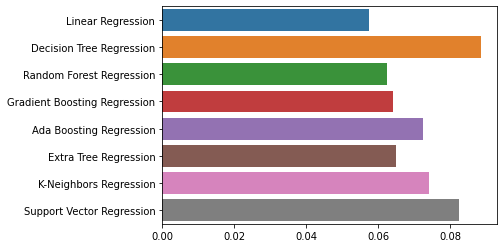

In [18]:
sns_plot = sns.barplot(x=x_ax, y=y_ax, linewidth=1.5)